In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set working directory
working_dir = r"C:\Users\Administrator\Desktop\SECRETS"
os.chdir(working_dir)

In [3]:
#Load dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#Shape of dataset
df.shape
print(f'Number of rows and columns: {df.shape}')

Number of rows and columns: (2111, 17)


In [5]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
#Descriptive statistics
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Oldest person was 61yrs old, youngest person was 14yrs old.

In [7]:
#Checking numerical columns
df.select_dtypes(exclude=[np.number]).columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
#Checking for categorical columns
df.select_dtypes(include=[np.number]).columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [9]:
#Checking for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
# Define the columns you want to exclude
exclude_cols = ['FCVC','NCP','CH2O','FAF','TUE'] 

# Check for unique values in numerical columns excluding specific columns
for col in df.columns:
    if col not in exclude_cols:
        print(f'{col}: {df[col].unique()}')

Gender: ['Female' 'Male']
Age: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Height: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Weight: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Visualization

In [11]:
from itertools import islice

# Create a copy of the original DataFrame
visual_df = df.copy()

# List of columns to be converted
columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Iterate over each column and make the changes
for column in columns:
    visual_df[column] = visual_df[column].round().astype(int)
    
# Mapping of values for the columns
mapping = {
    'NCP': {
        '1': 'Between 1 and 2',
        '2': 'Three',
        '3': 'More than three',
        '4': 'More than three'
    },
    'CH2O': {
        '1': 'Less than a liter',
        '2': 'Between 1 and 2 L',
        '3': 'More than 2 L',
    },
    'FAF': {
        '0': 'I do not have',
        '1': '1 or 2 days',
        '2': '2 or 4 days',
        '3': '4 or 5 days'
    },
    'TUE': {
        '1': '0–2 hours',
        '2': '3–5 hours',
        '3': 'More than 5 hours',
    },
    'FCVC': {
        '1': 'Never',
        '2': 'Sometimes',
        '3': 'Always',
    }
}

# Apply substitution according to the column
for column in columns:
    if column in mapping:
        visual_df[column] = visual_df[column].astype(str).replace(mapping[column])

new_column_names = {
    'FCVC': 'Frequency of consumption of vegetables (FCVC)',
    'NCP': 'Number of main meals (NCP)',
    'CH2O': 'Consumption of water daily (CH2O)',
    'FAF': 'Physical activity frequency (FAF)',
    'TUE': 'Time using technology devices (TUE)',
    'CALC': 'Consumption of alcohol (CALC)',
    'CAEC': 'Consumption of food between meals (CAEC)',
    'FAVC': 'Frequent consumption of high caloric food (SCC)',
    'SCC' : 'Calories consumption monitoring (FAVC)',    
}


# Renaming the columns using the dictionary
visual_df.rename(columns=new_column_names, inplace=True)

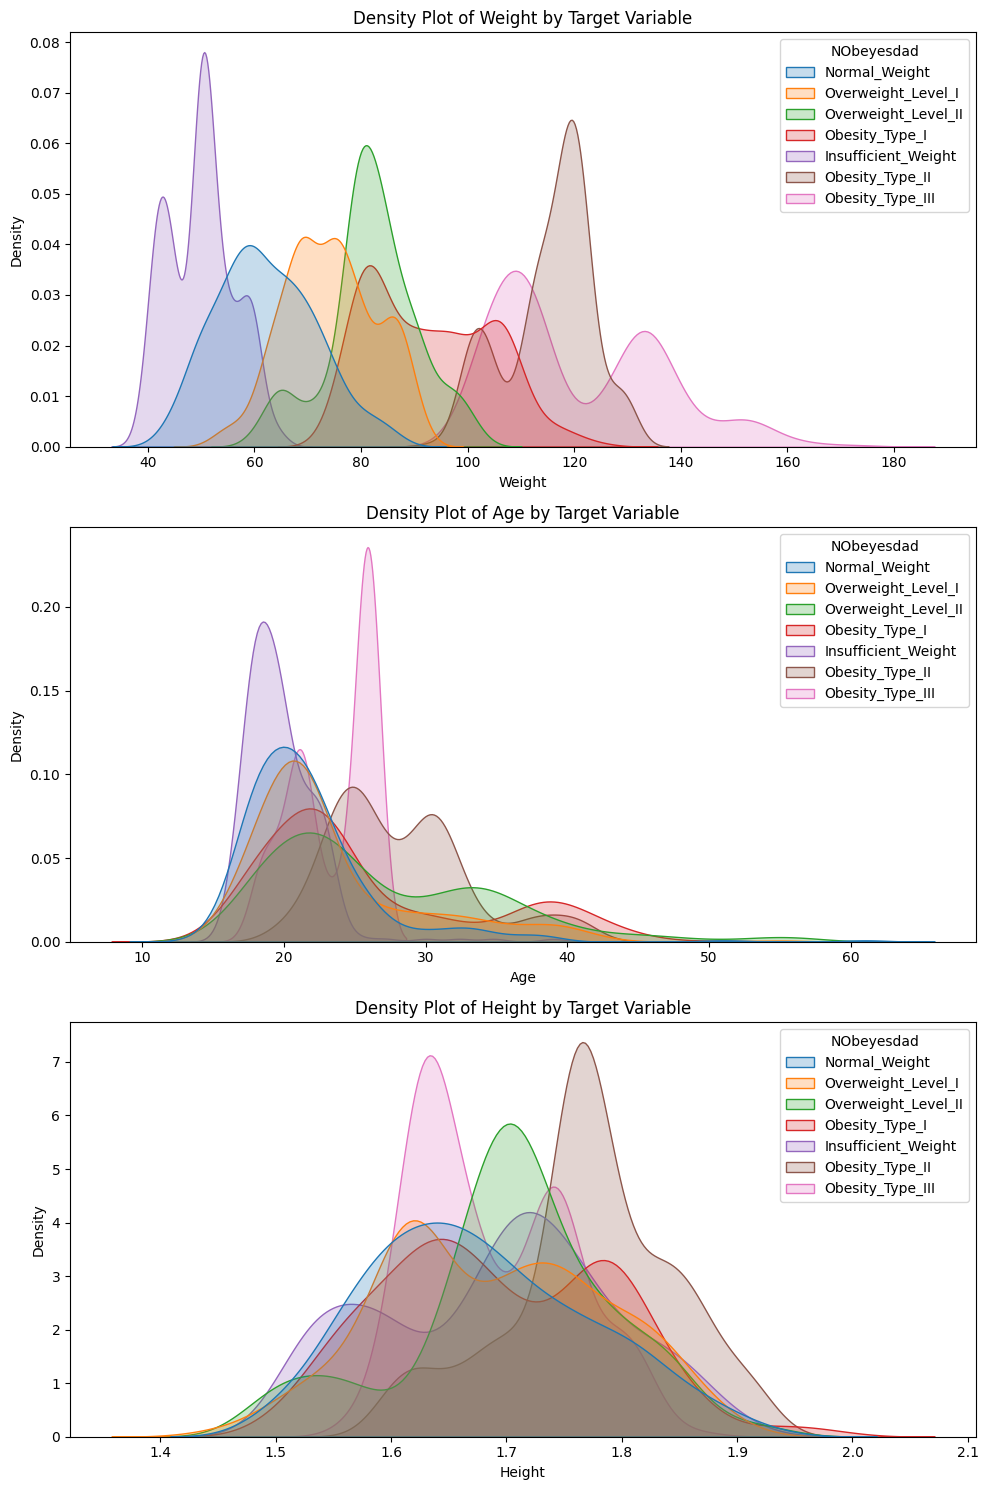

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Iterate through each feature and plot the density plot
for i, feature in enumerate(['Weight', 'Age', 'Height']):
    sns.kdeplot(data=visual_df, x=feature, hue='NObeyesdad', ax=axes[i], fill=True, common_norm=False)
    axes[i].set_title(f'Density Plot of {feature} by Target Variable')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


From the plots above:

Obesity type III is prevalent for people of weight 100 and above.
For the age plot, people between ages 20 and 30 are mostly affected with Obesity type III.
Obesity type II is prevalent for people of height 1.8.

In [13]:
import plotly.express as px

# Calculate the count of each category
gender_counts = visual_df['Gender'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(names=gender_counts.index, values=gender_counts.values,
             title='Distribution of Genders', hole=0.4)
fig.show()


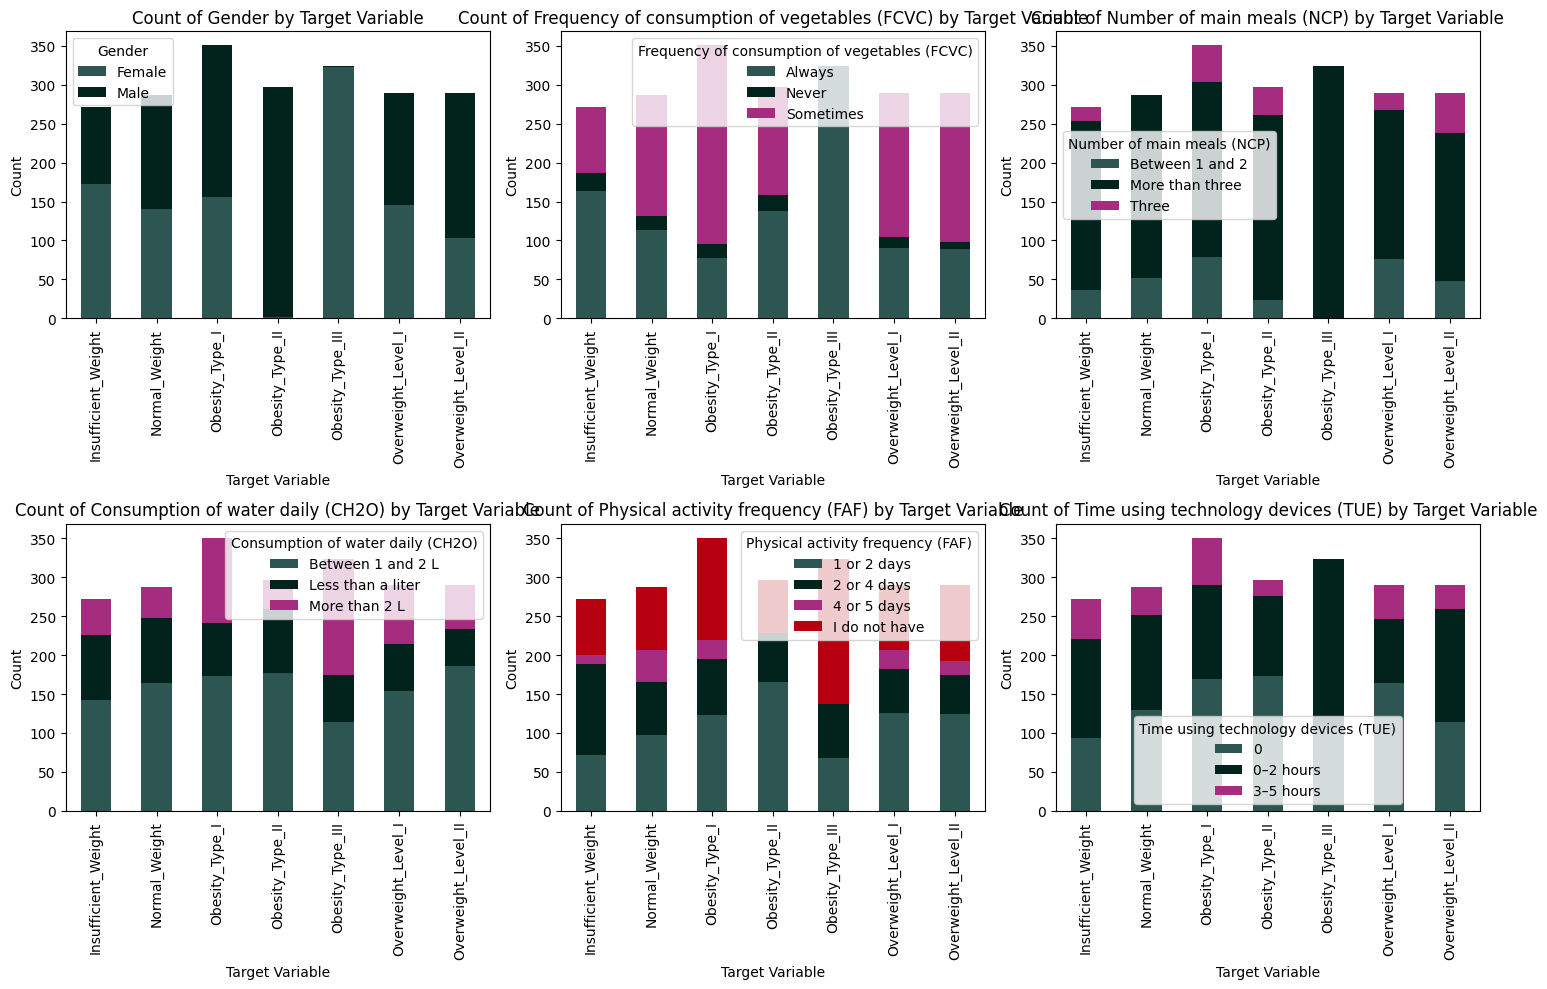

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_features_target(visual_df, col, color_palette=None, ax=None):
    # Set the color palette
    if color_palette is None:
        color_palette = sns.color_palette("husl")

    # Create a pivot table to count the occurrences of each combination of categories
    pivot_table = visual_df.groupby(['NObeyesdad', col]).size().unstack(fill_value=0)

    # Plot the stacked bar plot
    pivot_table.plot(kind='bar', stacked=True, color=color_palette, ax=ax)
    
    # Set the title and labels
    ax.set_title(f'Count of {col} by Target Variable')
    ax.set_xlabel('Target Variable')
    ax.set_ylabel('Count')
    ax.legend(title=col)

# Define the categorical columns and color palette
columns = ['Gender', 'Frequency of consumption of vegetables (FCVC)', 
           'Number of main meals (NCP)', 'Consumption of water daily (CH2O)', 
           'Physical activity frequency (FAF)', 'Time using technology devices (TUE)']
colors_2 = ["#2D5653", "#02231C", "#a62c7f", "#b6000f", "#5c1a86", "#ff6b22", "#fffc22"]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Call the function for each categorical column
for i, col in enumerate(columns):
    plot_categorical_features_target(visual_df, col, color_palette=colors_2, ax=axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


Obesity_Type_III is almost always composed of only one class of each feature.
Obesity_Type_II is exclusively composed of men, and Obesity_Type_III exclusively of women.

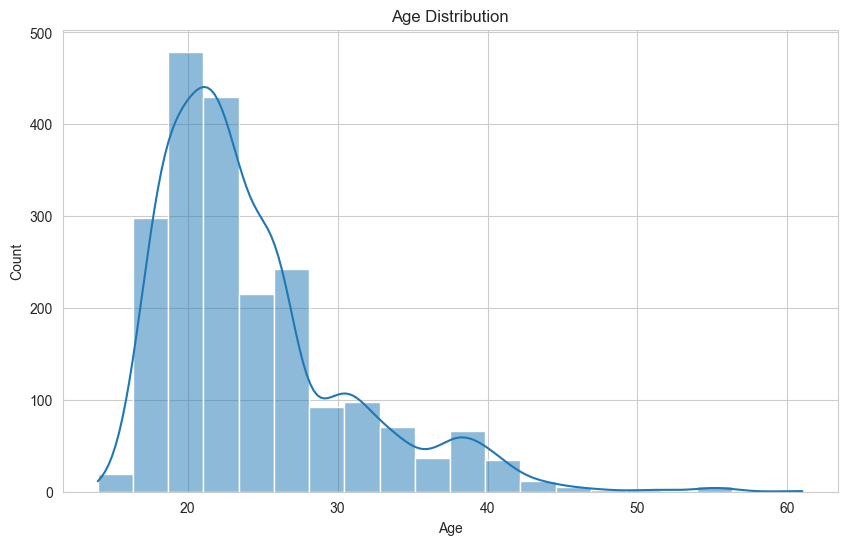

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(visual_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Majority of the people in the dataset are between the ages of 20 and 30 and the older age groups of 40 and above are underrepresented.

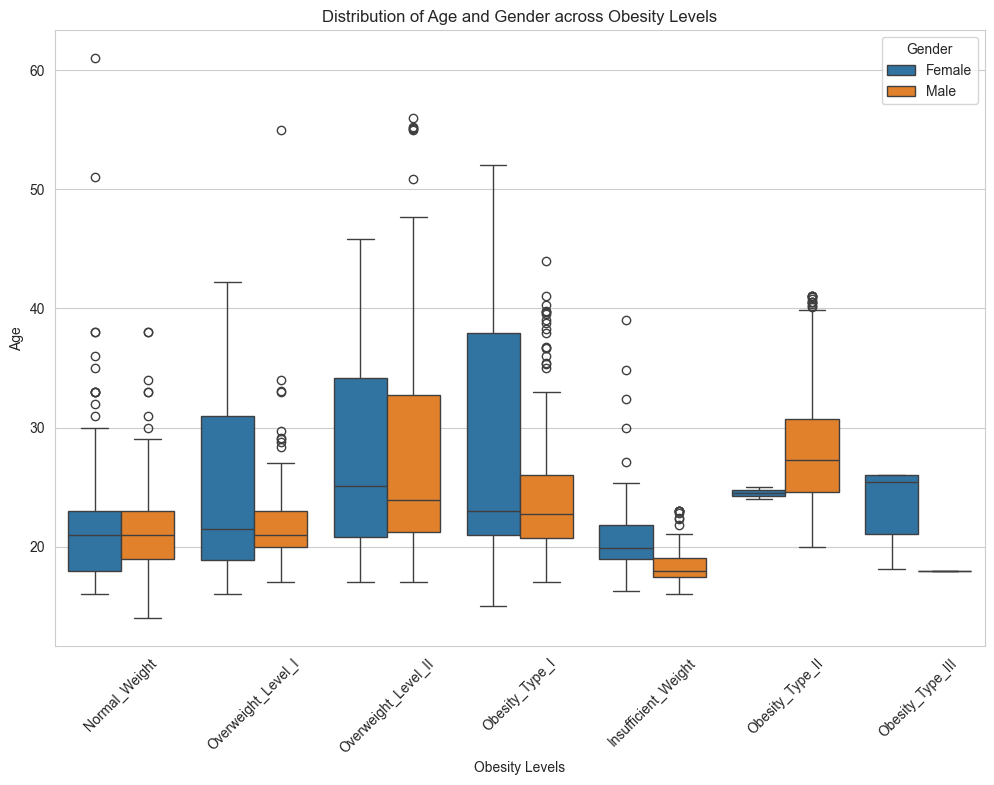

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=visual_df, x='NObeyesdad', y='Age', hue='Gender')
plt.title('Distribution of Age and Gender across Obesity Levels')
plt.xlabel('Obesity Levels')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()


Younger individuals are more represented in the Normal Weight and Insufficient Weight categories.

Older individuals tend to be more represented in higher obesity levels, especially Obesity Types I, II, and III.

There are noticeable differences in age distribution between genders across the obesity levels, with males generally showing higher median ages in more severe obesity categories.

In [17]:
import plotly.express as px

# Calculate the count of each category
family_history_counts = visual_df['family_history_with_overweight'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(names=family_history_counts.index, values=family_history_counts,
             title='Distribution of Family History of Overweight')
fig.show()



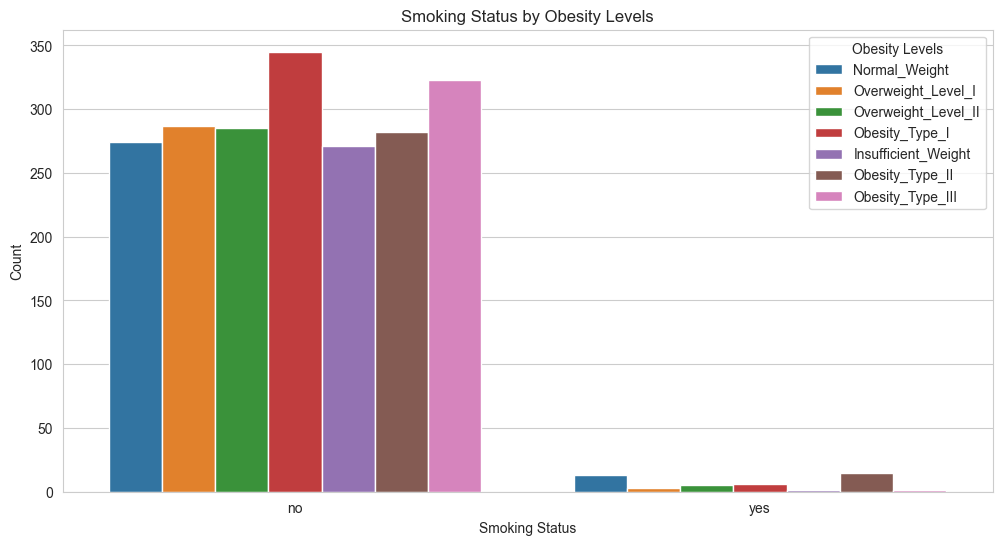

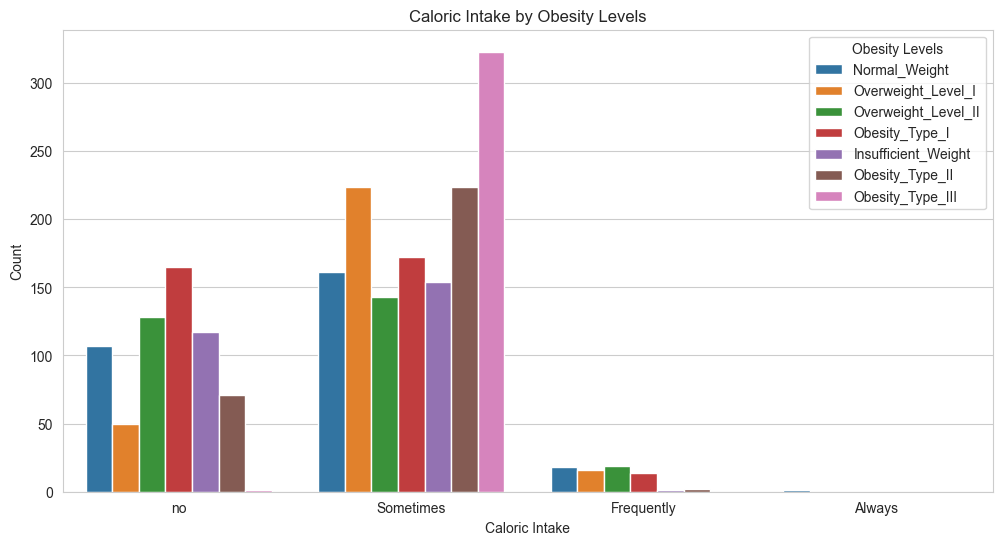

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create grouped bar plots for smoking status by obesity levels
plt.figure(figsize=(12, 6))
sns.countplot(data=visual_df, x='SMOKE', hue='NObeyesdad')
plt.title('Smoking Status by Obesity Levels')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Obesity Levels')
plt.show()

# Create grouped bar plots for caloric intake (CALC) by obesity levels
plt.figure(figsize=(12, 6))
sns.countplot(data=visual_df, x='Consumption of alcohol (CALC)', hue='NObeyesdad')
plt.title('Caloric Intake by Obesity Levels')
plt.xlabel('Caloric Intake')
plt.ylabel('Count')
plt.legend(title='Obesity Levels')
plt.show()


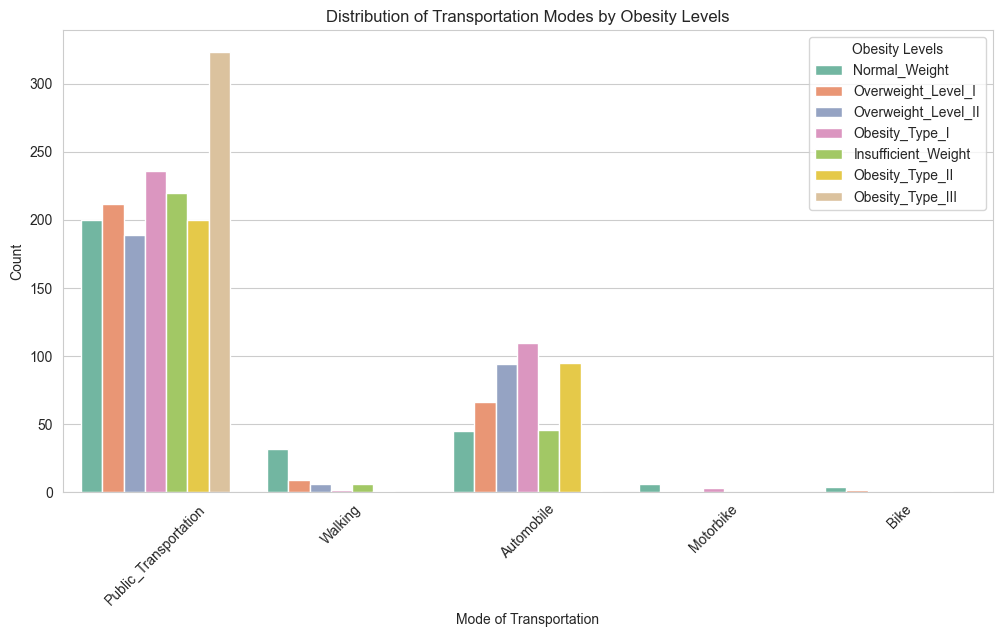

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for 'MTRANS' and 'NObeyesdad' columns
transport_obesity_data = visual_df[['MTRANS', 'NObeyesdad']]

# Group data by 'MTRANS' and 'NObeyesdad' and count occurrences
grouped_data = transport_obesity_data.groupby(['MTRANS', 'NObeyesdad']).size().unstack()

# Plot the distribution of transportation modes by obesity levels
plt.figure(figsize=(12, 6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=transport_obesity_data, palette='Set2')
plt.title('Distribution of Transportation Modes by Obesity Levels')
plt.xlabel('Mode of Transportation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Obesity Levels')
plt.show()

Majority of people walking have normal weight.
Obesity levels are more prevalent among individuals who use public transport and automobiles which shows obesity can be influenced by lifestyle.

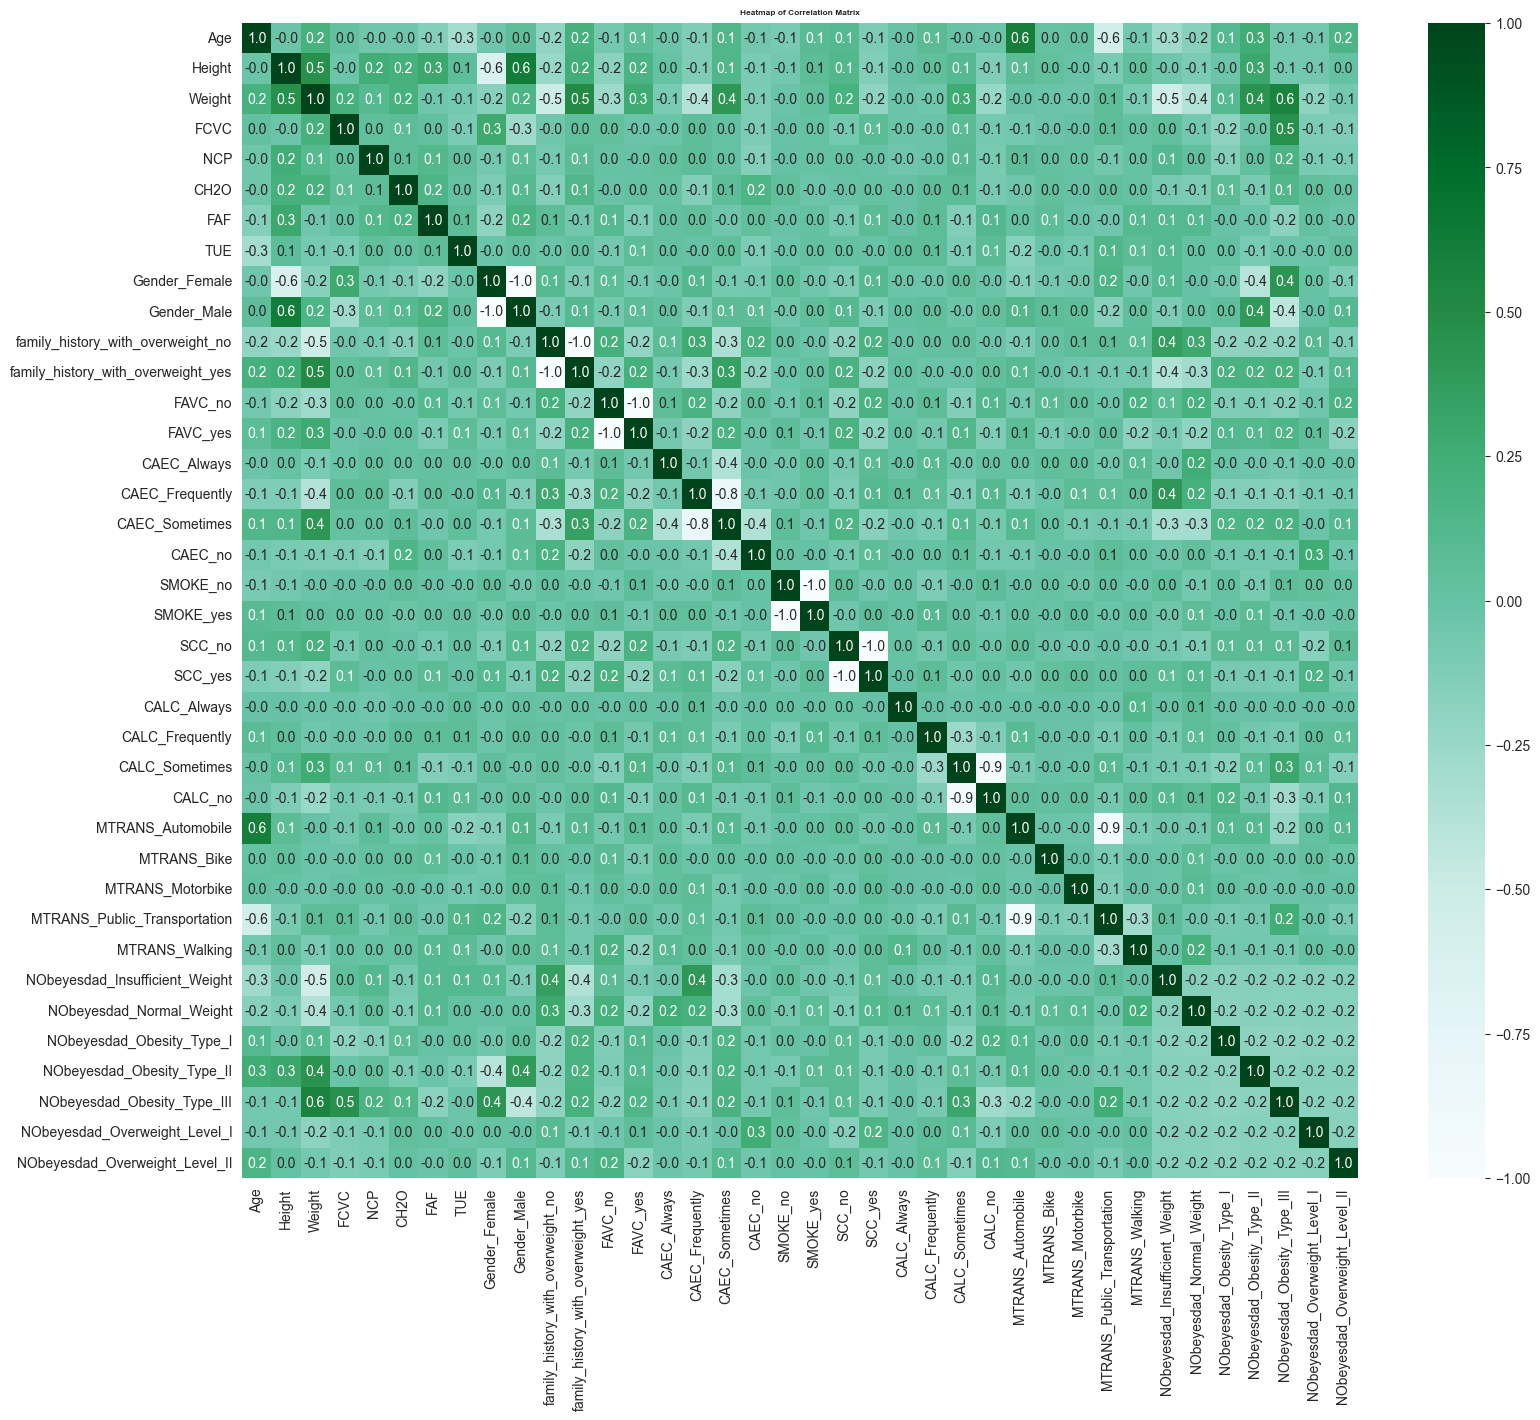

In [20]:
# Creating Dummy Columns 
df_dummies = pd.get_dummies(df)

# Calculating correlation matrix 
correlation_matrix = df_dummies.corr()

# Plotting heatmap 
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".1f")
plt.title('Heatmap of Correlation Matrix', weight='bold', size=6)
plt.show()

Data Preprocessing

In [21]:
# After visualization we shall now use the original data (df)
# Renaming column 
df.rename(columns={'family_history_with_overweight':'FHWO'},inplace=True)

In [22]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [23]:
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender','FAVC','SMOKE','SCC','CALC']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [25]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns for one-hot encoding
cols = ['FHWO', 'CAEC', 'MTRANS']

# Select the columns to be encoded
data_to_encode = df[cols]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  
encoded_data = encoder.fit_transform(data_to_encode)

# Creating a DataFrame with the transformed features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols))

# Dropping the original columns from the original DataFrame
df.drop(columns=cols, inplace=True)

# Joining the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

In [26]:
df_encoded.head()

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,FHWO_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,0,2.0,3.0,0,2.0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,21.0,1.52,56.0,0,3.0,3.0,1,3.0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,23.0,1.80,77.0,0,2.0,3.0,0,2.0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,27.0,1.80,87.0,0,3.0,3.0,0,2.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,22.0,1.78,89.8,0,2.0,1.0,0,2.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


All columns are in numerics

Training models

In [27]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=23)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1372, 24)
(739, 24)
(1372,)
(739,)


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_gs =  RandomForestClassifier(random_state = 23)
rf_gs.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

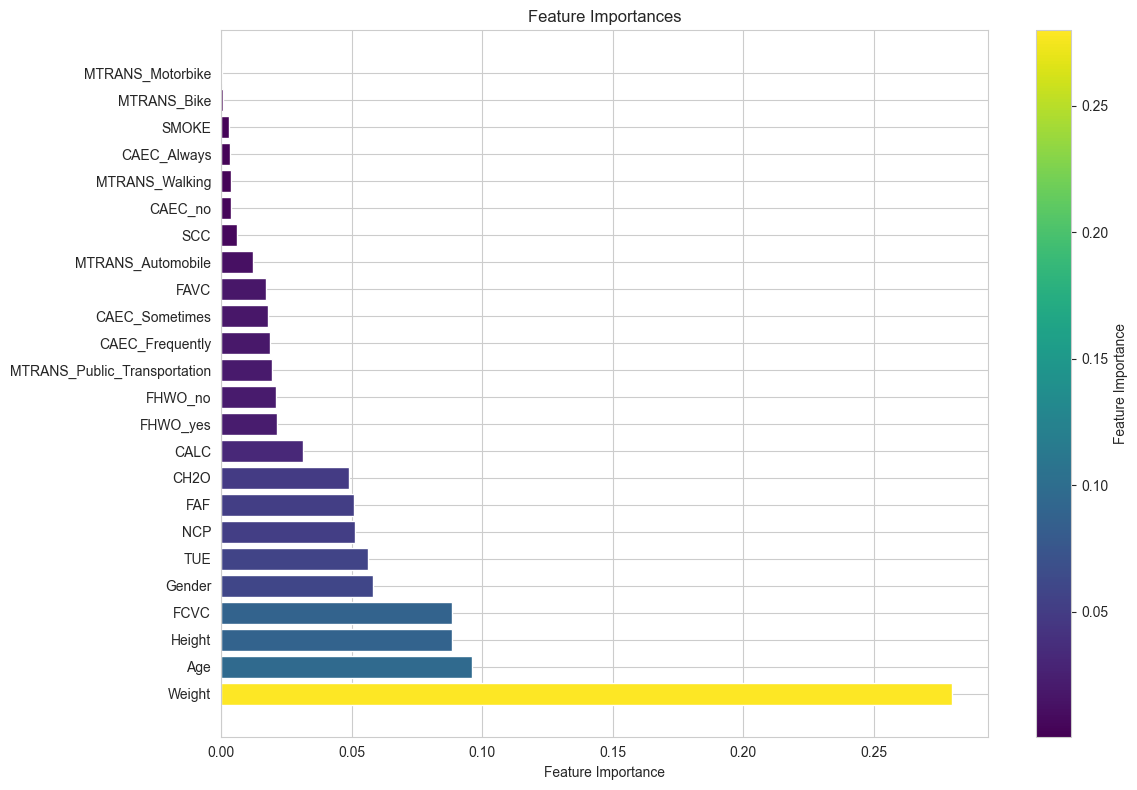

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Extract feature importances from the classifier
importances = rf_gs.feature_importances_

# Get feature names from the DataFrame
feature_names = X.columns

# Sort feature importances
indices = np.argsort(importances)

# Normalize importances for color mapping
norm = plt.Normalize(importances.min(), importances.max())
cmap = plt.cm.viridis

# Generate colors based on importances
colors = cmap(norm(importances))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the feature importances as horizontal bars
bars = ax.barh(range(X_train.shape[1]), importances[indices], color=colors[indices], align="center")
ax.set_yticks(range(X_train.shape[1]))
ax.set_yticklabels([feature_names[i] for i in indices])
ax.set_xlabel("Feature Importance")
ax.set_title("Feature Importances")
ax.invert_yaxis()  # Invert y-axis to show most important feature at the top
ax.grid(True)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Feature Importance')

plt.tight_layout()
plt.show()


Weight, Age, Height, FCVC and Gender appear to be the most important features.

In [31]:
#Predicting on the training set
y_pred_train = rf_gs.predict(X_train)
print(classification_report(y_train, y_pred_train))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00       193
      Normal_Weight       1.00      1.00      1.00       178
     Obesity_Type_I       1.00      1.00      1.00       232
    Obesity_Type_II       1.00      1.00      1.00       184
   Obesity_Type_III       1.00      1.00      1.00       224
 Overweight_Level_I       1.00      1.00      1.00       173
Overweight_Level_II       1.00      1.00      1.00       188

           accuracy                           1.00      1372
          macro avg       1.00      1.00      1.00      1372
       weighted avg       1.00      1.00      1.00      1372



In [32]:
#Predicting on the test set
y_pred_test = rf_gs.predict(X_test)

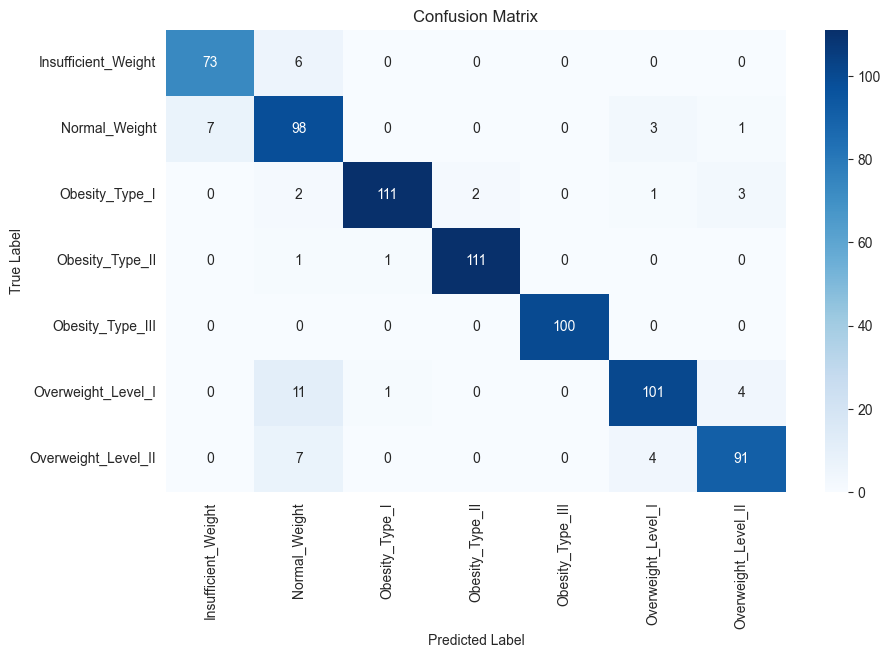

In [33]:
from sklearn.metrics import confusion_matrix
# Assuming y_test contains the class labels
class_labels = np.unique(y_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Forest Classifier

In [34]:
# Define the parameter grid you want to search over
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the cross-validation and grid search function
def cross_val_and_gridsearch(model, param_grid, X_train, y_train):
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')
    
    # Grid Search
    gscv = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)
    gscv.fit(X_train, y_train)
    best_params = gscv.best_params_
    print(f'Best parameters from Grid Search: {best_params}')
    
    return gscv.best_estimator_

# Instantiate the RandomForestClassifier
rf_gs = RandomForestClassifier(random_state=23)

# Call the cross-validation and grid search function and get the best estimator
best_rf = cross_val_and_gridsearch(rf_gs, rf_params, X_train, y_train)
print(f'Best Random Forest model: {best_rf}')

# Get the best parameters from the best_rf model
best_params = best_rf.get_params()


Cross-Validation Accuracy Scores: [0.92363636 0.93818182 0.91240876 0.95620438 0.92335766]
Average Cross-Validation Accuracy: 0.930757796947578
Best parameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest model: RandomForestClassifier(random_state=23)


In [35]:
# Training the Random Forest classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [36]:
# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

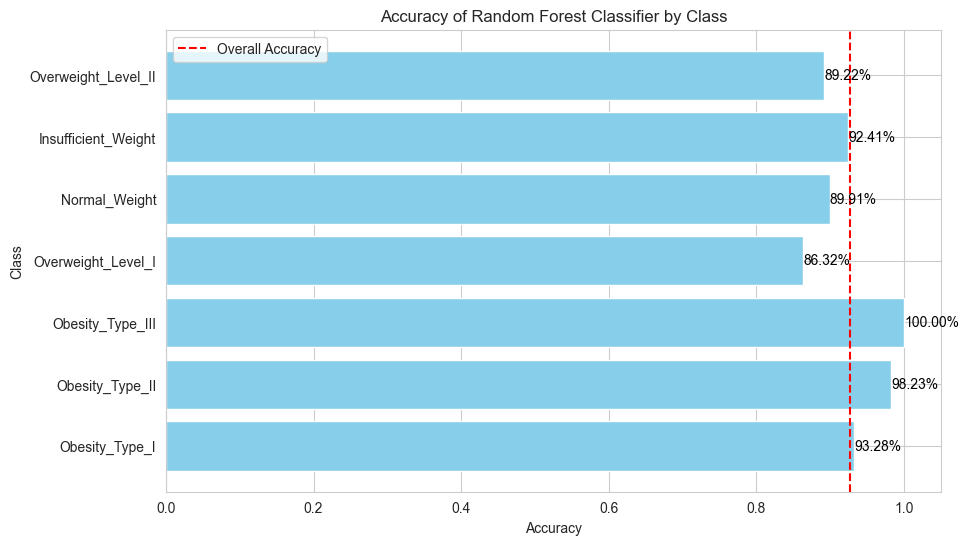

In [37]:
# Calculate overall accuracy
overall_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate accuracy for each class
class_accuracy_rf = {}
for label in set(y_test):
    indices = y_test == label
    class_accuracy_rf[label] = accuracy_score(y_test[indices], y_pred_rf[indices])

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
bars_rf = plt.barh(list(class_accuracy_rf.keys()), list(class_accuracy_rf.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class')
plt.title('Accuracy of Random Forest Classifier by Class')
plt.axvline(x=overall_accuracy_rf, color='red', linestyle='--', label='Overall Accuracy')
plt.legend()

# Add percentage labels on top of bars
for bar in bars_rf:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


Decision Tree Classifier

In [38]:
# Define the parameter grid for DecisionTreeClassifier
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the cross-validation and grid search function
def cross_val_and_gridsearch(model, param_grid, X_train, y_train):
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')
    
    # Grid Search
    gscv = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)
    gscv.fit(X_train, y_train)
    best_params = gscv.best_params_
    print(f'Best parameters from Grid Search: {best_params}')
    
    return gscv.best_estimator_, best_params

# Instantiate the DecisionTreeClassifier
dt_gs = DecisionTreeClassifier(random_state=23)

# Call the cross-validation and grid search function and get the best estimator and parameters
best_dt, best_params = cross_val_and_gridsearch(dt_gs, dt_params, X_train, y_train)

# Filter best_params to remove any invalid parameters for DecisionTreeClassifier
valid_params = {k: v for k, v in best_params.items() if k in DecisionTreeClassifier().get_params()}



Cross-Validation Accuracy Scores: [0.92       0.92363636 0.90510949 0.93065693 0.93065693]
Average Cross-Validation Accuracy: 0.9220119442601196
Best parameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
# Training the decision tree classifiers with the best parameters
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
#Predicting on the test set
y_pred_dt = best_dt.predict(X_test)

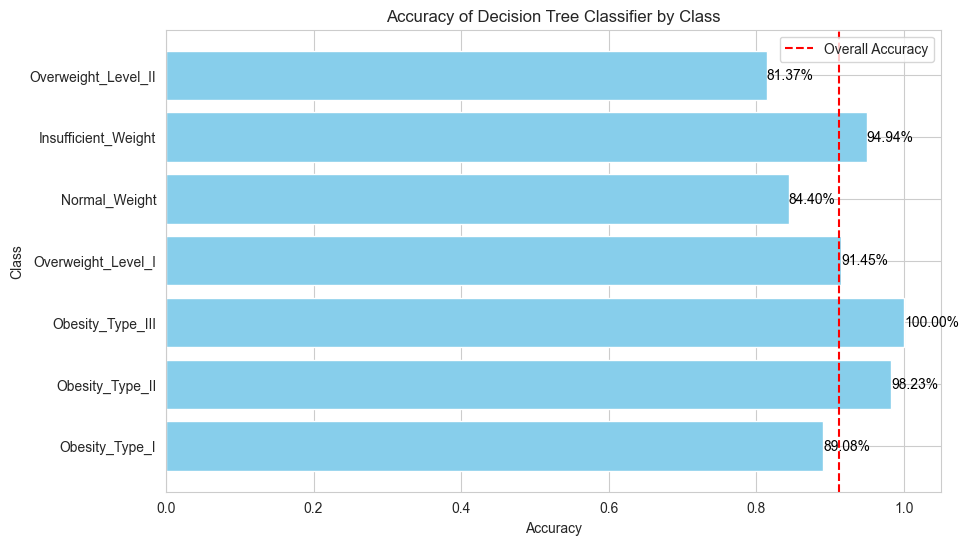

In [41]:
# Calculate overall accuracy
overall_accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate accuracy for each class
class_accuracy_dt = {}
for label in set(y_test):
    indices = y_test == label
    class_accuracy_dt[label] = accuracy_score(y_test[indices], y_pred_dt[indices])

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
bars_dt = plt.barh(list(class_accuracy_dt.keys()), list(class_accuracy_dt.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class')
plt.title('Accuracy of Decision Tree Classifier by Class')
plt.axvline(x=overall_accuracy_dt, color='red', linestyle='--', label='Overall Accuracy')
plt.legend()

# Add percentage labels on top of bars
for bar in bars_dt:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


Support Vector Machine Classifier

In [42]:
# Define and call the gridsearch function with cross-validation
def gridsearch(model, param_grid, X_train, y_train):
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')
    
    # Grid search
    gscv = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)
    gscv.fit(X_train, y_train)
    best_params = gscv.best_params_
    print(f'Best parameters from Grid Search: {best_params}')
    
    return best_params

# Define the parameter grid for SVC
svm_params = {
    'svc__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],
    'svc__degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'svc__class_weight': [None, 'balanced']
}

# Create a pipeline with scaling and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=23))
])

# Call gridsearch function with cross-validation and print the best parameters
svm_best_params = gridsearch(pipeline, svm_params, X_train, y_train)


Cross-Validation Accuracy Scores: [0.83636364 0.81454545 0.81386861 0.83941606 0.7919708 ]
Average Cross-Validation Accuracy: 0.819232913072329
Best parameters from Grid Search: {'svc__C': 10.0, 'svc__class_weight': None, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [43]:
# Remove the prefix from the parameter names
svm_best_params = {param.split('__')[1]: value for param, value in svm_best_params.items()}

# Initialize and train the SVC model with the best parameters
best_svm = SVC(**svm_best_params, random_state=23)
best_svm.fit(X_train, y_train)

SVC(C=10.0, degree=2, kernel='linear', random_state=23)

In [44]:
# Predict on the test set
y_pred_svm = best_svm.predict(X_test)

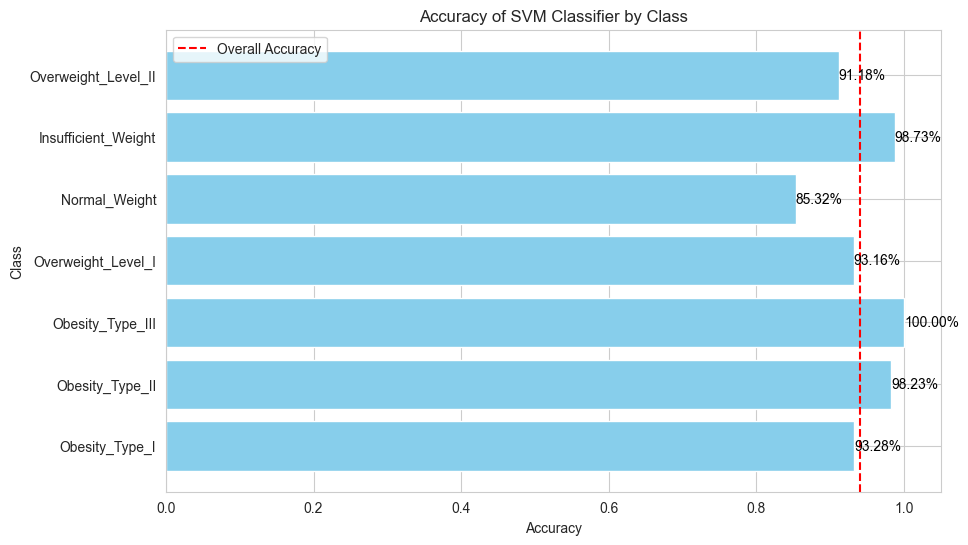

In [45]:
# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred_svm)

# Calculate accuracy for each class
class_accuracy = {}
for label in set(y_test):
    indices = y_test == label
    class_accuracy[label] = accuracy_score(y_test[indices], y_pred_svm[indices])

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
bars = plt.barh(list(class_accuracy.keys()), list(class_accuracy.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class')
plt.title('Accuracy of SVM Classifier by Class')
plt.axvline(x=overall_accuracy, color='red', linestyle='--', label='Overall Accuracy')
plt.legend()

# Add percentage labels on top of bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


K-Nearest Neighbors Classifier

In [46]:
# Define and call the gridsearch function with cross-validation
def gridsearch(model, param_grid, X_train, y_train):
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')
    
    # Grid search
    gscv = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)
    gscv.fit(X_train, y_train)
    best_params = gscv.best_params_
    print(f'Best parameters from Grid Search: {best_params}')
    
    return best_params

# Define the parameter grid for KNeighborsClassifier
knn_params = {
    'knn__weights': ['uniform', 'distance'], # Weight function used in prediction
    'knn__p': [1, 2, 3]                         # Distance metric (1: Manhattan, 2: Euclidean)
}


# Create a pipeline with scaling and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Call gridsearch function with cross-validation and print the best parameters
knn_best_params = gridsearch(pipeline, knn_params, X_train, y_train)


Cross-Validation Accuracy Scores: [0.80363636 0.76363636 0.75547445 0.81021898 0.77372263]
Average Cross-Validation Accuracy: 0.7813377571333776
Best parameters from Grid Search: {'knn__p': 1, 'knn__weights': 'distance'}


In [47]:
# Remove pipeline step name prefix from best parameters
knn_best_params = {key.split('__')[1]: value for key, value in knn_best_params.items()}

# Training the K-Nearest Neighbors classifiers with the best parameters
best_knn = KNeighborsClassifier(**knn_best_params)
best_knn.fit(X_train, y_train)


KNeighborsClassifier(p=1, weights='distance')

In [48]:
#Predicting on the test set
y_pred_knn = best_knn.predict(X_test)

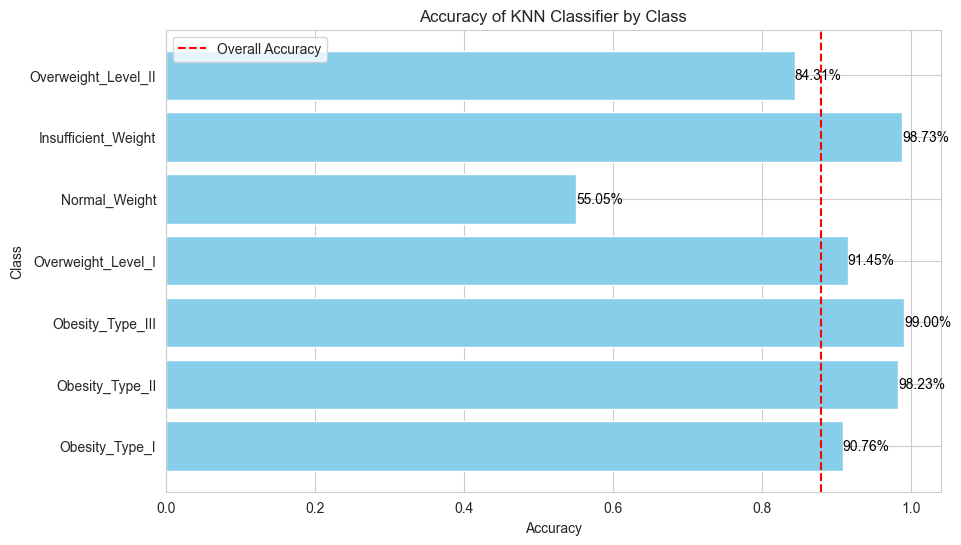

In [49]:
# Calculate overall accuracy
overall_accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate accuracy for each class
class_accuracy_knn = {}
for label in set(y_test):
    indices = y_test == label
    class_accuracy_knn[label] = accuracy_score(y_test[indices], y_pred_knn[indices])

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
bars_knn = plt.barh(list(class_accuracy_knn.keys()), list(class_accuracy_knn.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class')
plt.title('Accuracy of KNN Classifier by Class')
plt.axvline(x=overall_accuracy_knn, color='red', linestyle='--', label='Overall Accuracy')
plt.legend()

# Add percentage labels on top of bars
for bar in bars_knn:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


Gradient Boosting Classifier

In [50]:
# Define and call the gridsearch function with cross-validation
def gridsearch(model, param_grid, X_train, y_train):
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')
    
    # Grid search
    gscv = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)
    gscv.fit(X_train, y_train)
    best_params = gscv.best_params_
    print(f'Best parameters from Grid Search: {best_params}')
    
    return best_params

# Define the parameter grid for GradientBoostingClassifier
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

# Train the initial GradientBoostingClassifier
gb_gs = GradientBoostingClassifier(random_state=23)

# Call gridsearch function with cross-validation and print the best parameters
gb_best_params = gridsearch(gb_gs, gb_params, X_train, y_train)


Cross-Validation Accuracy Scores: [0.94909091 0.97818182 0.94890511 0.95255474 0.93430657]
Average Cross-Validation Accuracy: 0.9526078301260783
Best parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [51]:
#Training the Gradient Boosting classifiers with the best parameters
best_gb = GradientBoostingClassifier(**gb_best_params, random_state=23)
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=23)

In [52]:
#Predicting on the test set
y_pred_gb = best_gb.predict(X_test)

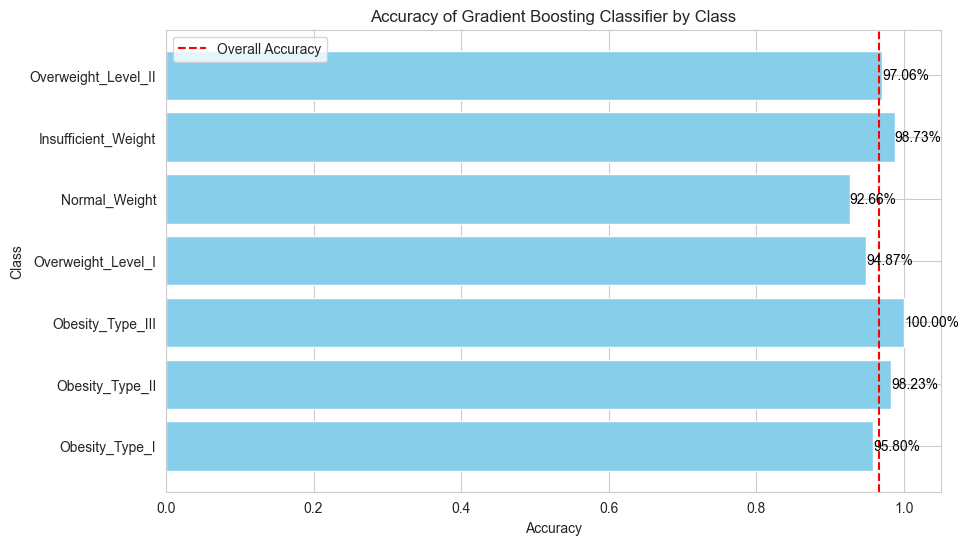

In [53]:
# Calculate overall accuracy
overall_accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Calculate accuracy for each class
class_accuracy_gb = {}
for label in set(y_test):
    indices = y_test == label
    class_accuracy_gb[label] = accuracy_score(y_test[indices], y_pred_gb[indices])

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
bars_gb = plt.barh(list(class_accuracy_gb.keys()), list(class_accuracy_gb.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class')
plt.title('Accuracy of Gradient Boosting Classifier by Class')
plt.axvline(x=overall_accuracy_gb, color='red', linestyle='--', label='Overall Accuracy')
plt.legend()

# Add percentage labels on top of bars
for bar in bars_gb:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

Multi-layer Perceptron Classifier

In [54]:
# Define and call the gridsearch function with cross-validation
def gridsearch(model, param_grid, X_train, y_train):
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')
    
    # Grid search
    gscv = GridSearchCV(estimator=model, 
                        param_grid=param_grid, 
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)
    gscv.fit(X_train, y_train)
    best_params = gscv.best_params_
    print(f'Best parameters from Grid Search: {best_params}')
    
    return best_params

# Define the parameter grid for MLPClassifier
mlp_params = {
    'mlp__hidden_layer_sizes': [(10,), (50,), (100,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create a pipeline with scaling and MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=23))
])

# Call gridsearch function with cross-validation and print the best parameters
mlp_best_params = gridsearch(pipeline, mlp_params, X_train, y_train)



Cross-Validation Accuracy Scores: [0.90909091 0.88       0.8649635  0.90510949 0.8540146 ]
Average Cross-Validation Accuracy: 0.882635700066357
Best parameters from Grid Search: {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant'}


In [55]:
# Remove the 'mlp__' prefix from the keys
mlp_best_params = {key.split('__')[1]: value for key, value in mlp_best_params.items()}
#Training the MLP classifiers with the best parameters
best_mlp = MLPClassifier(**mlp_best_params, random_state=23)
best_mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', random_state=23)

In [56]:
#Predicting on the test set
y_pred_mlp = best_mlp.predict(X_test)

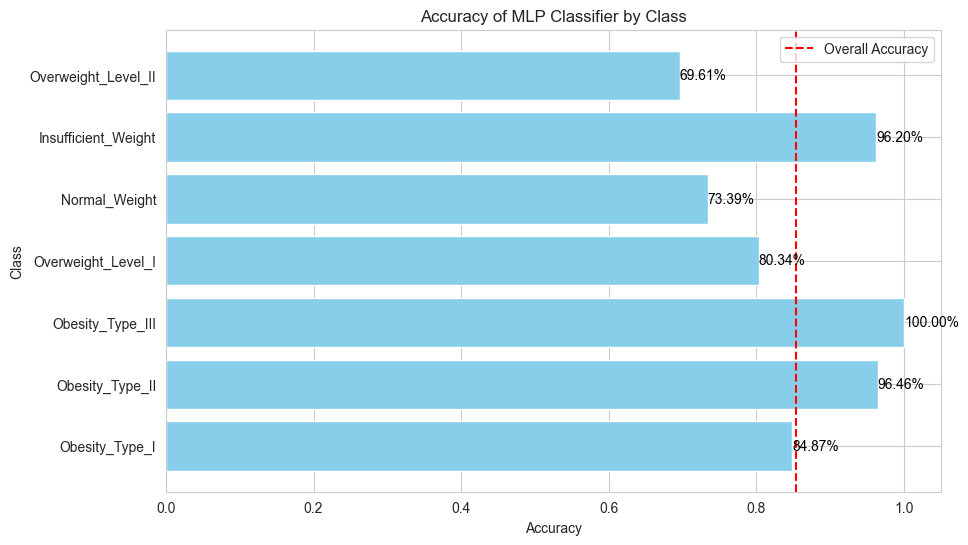

In [57]:
# Calculate overall accuracy
overall_accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Calculate accuracy for each class
class_accuracy_mlp = {}
for label in set(y_test):
    indices = y_test == label
    class_accuracy_mlp[label] = accuracy_score(y_test[indices], y_pred_mlp[indices])

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
bars_mlp = plt.barh(list(class_accuracy_mlp.keys()), list(class_accuracy_mlp.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class')
plt.title('Accuracy of MLP Classifier by Class')
plt.axvline(x=overall_accuracy_mlp, color='red', linestyle='--', label='Overall Accuracy')
plt.legend()

# Add percentage labels on top of bars
for bar in bars_mlp:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


Obesity_Type_III consistently emerges as the best-performing class across most models.

Model Evaluation

In [58]:
from tabulate import tabulate
from sklearn.metrics import classification_report

# Fitting the classifiers with the best parameters
classifiers = [
    ("RandomForestClassifier", best_rf),
    ("DecisionTreeClassifier", best_dt),
    ("SVM", best_svm),
    ("KNN", best_knn),   
    ("GradientBoostingClassifier", best_gb),
    ("MLPClassifier", best_mlp)
]

# Initialize an empty list to store classification reports
reports = []

# Iterate over each classifier and generate the classification report
for clf_name, clf in classifiers:
    y_pred = clf.predict(X_test)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract relevant metrics
    metrics = clf_report['weighted avg']
    accuracy = clf_report['accuracy']
    
    # Format classification report
    report = {
        'Model': clf_name,
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'f1-score': metrics['f1-score'],
        'support': metrics['support'],
        'accuracy': accuracy
    }
    
    reports.append(report)

# Sort reports by accuracy
reports_sorted = sorted(reports, key=lambda x: x['accuracy'], reverse=True)

# Print classification reports in a table format
headers = ['Model', 'precision', 'recall', 'f1-score', 'support', 'accuracy']
rows = [[report[field] for field in headers] for report in reports_sorted]
print(tabulate(rows, headers=headers, tablefmt='grid'))



+----------------------------+-------------+----------+------------+-----------+------------+
| Model                      |   precision |   recall |   f1-score |   support |   accuracy |
+============================+=============+==========+============+===========+============+
| GradientBoostingClassifier |    0.966594 | 0.966171 |   0.966164 |       739 |   0.966171 |
+----------------------------+-------------+----------+------------+-----------+------------+
| SVM                        |    0.942301 | 0.94046  |   0.94039  |       739 |   0.94046  |
+----------------------------+-------------+----------+------------+-----------+------------+
| RandomForestClassifier     |    0.930457 | 0.926928 |   0.9278   |       739 |   0.926928 |
+----------------------------+-------------+----------+------------+-----------+------------+
| DecisionTreeClassifier     |    0.912658 | 0.912043 |   0.911507 |       739 |   0.912043 |
+----------------------------+-------------+----------+-----

The GradientBoostingClassifier achieved the highest accuracy of 96% on the test set.

All models performed well across various weight categories, with some variations in accuracy and F1-scores.

The MLPClassifier achieved an accuracy of 85%, with relatively lower precision, recall, and F1-scores compared to other models.

In [59]:
# Initialize base estimators (your models)
base_estimators = [
    ('random_forest', RandomForestClassifier()),
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC()),
    ('knn', KNeighborsClassifier()),
    ('gradient_boosting', GradientBoostingClassifier()),
    ('mlp', MLPClassifier())
]

# Initialize meta-classifier (e.g., logistic regression)
meta_classifier = LogisticRegression()

# Initialize StackingClassifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=meta_classifier)

# Train the StackingClassifier
stacking_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_stacking = stacking_classifier.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_stacking)
print("Accuracy:", accuracy)

# Evaluate precision
precision = precision_score(y_test, y_pred_stacking, average='weighted')
print("Precision:", precision)

# Evaluate recall
recall = recall_score(y_test, y_pred_stacking, average='weighted')
print("Recall:", recall)

# Evaluate F1-score
f1 = f1_score(y_test, y_pred_stacking, average='weighted')
print("F1-score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9512855209742895
Precision: 0.9512691608754379
Recall: 0.9512855209742895
F1-score: 0.9511971499926366
Confusion Matrix:
[[ 78   1   0   0   0   0   0]
 [  5  98   0   0   0   6   0]
 [  0   0 115   2   0   0   2]
 [  0   0   2 111   0   0   0]
 [  0   0   0   0 100   0   0]
 [  0   7   0   0   0 106   4]
 [  0   1   1   0   0   5  95]]


Accuracy: The stacking classifier achieved an accuracy of approximately 95.66%, indicating that around 95.66% of the predictions were correct

Saving my model

In [61]:
import pickle

# Assuming best_gb is your best-performing model
best_model = best_gb

# Define the file path where you want to save your model, including the file name and extension
model_path = r"C:\Users\Administrator\Desktop\SECRETS\best_model.pkl"

# Serialize the model to a file in binary mode
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully.")

Model saved successfully.


Model Deployment